# Set up 

In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
#upgrade needed for certain plots
!pip install pyqt5

In [161]:
#import player data
player = pd.read_csv('2023 FF Master List.csv')
player.head()

,order,WEEK,TEAM NAME,ABBR,POS,TEAM,SLOT,PLAYER,PROJ,FPTS
0,1,1,Team :(,SA,QB,Chi,QB,Justin Fields,19.5,14.54
1,2,1,Team :(,SA,RB,TB,RB,Rachaad White,13.9,6.90
2,3,1,Team :(,SA,RB,Atl,RB,Tyler Allgeier,8.8,24.40
3,4,1,Team :(,SA,WR,Cin,WR,Tee Higgins,14.6,0.00
4,5,1,Team :(,SA,WR,LAR,WR,Van Jefferson,10.8,6.40


In [72]:
#import standings data
standings = pd.read_csv('FF Week 10.csv')
standings

,RK,TEAM,ABBR,W,L,T,PCT,GB,PLAYOFF %,PF,PA,DIV,HOME,AWAY,STRK,MOVES
0,1,Killit Skillets,CP,7,3,0,0.7,--,93,1341.70,1108.70,7/3/2000,2/2/2000,5/1/2000,W3,20
1,2,Giles C,JG,7,3,0,0.7,--,86,1148.58,1083.08,7/3/2000,3/2/2000,4/1/2000,L1,6
2,3,Bully Heart,MF,6,4,0,0.6,1,61,1277.20,1145.72,6/4/2000,3/2/2000,3/2/2000,W1,15
3,4,Crock Pot,DB,6,4,0,0.6,1,43,1124.42,1140.30,6/4/2000,4/1/2000,2/3/2000,W1,25
4,5,Talking Taints,CM,6,4,0,0.6,1,49,1107.98,1102.52,6/4/2000,3/2/2000,3/2/2000,L4,7
5,6,Paimon's Lament,MC,5,5,0,0.5,2,31,1377.80,1201.78,5/5/2000,3/3/2000,2/2/2000,W1,13
6,7,Captain Ben Safarz,SB,5,5,0,0.5,2,31,1256.40,1238.40,5/5/2000,2/4/2000,3/1/2000,L2,6
7,8,Big Fat Poons,LW,4,6,0,0.4,3,5,1171.64,1173.22,4/6/2000,1/3/2000,3/3/2000,L2,10
8,9,Kush Warlock,MW,4,6,0,0.4,3,1,1025.76,1204.68,4/6/2000,3/2/2000,1/4/2000,L1,10
9,10,Team :(,SA,4,6,0,0.4,3,1,990.74,1153.62,4/6/2000,1/4/2000,3/2/2000,L1,6


In [41]:
#create function for graphing/labeling to save repetitive steps
def label(x, y, t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.legend()
    plt.show()

# Cleaning

player dataset

In [42]:
#check datatypes
player.dtypes

order          int64
WEEK           int64
TEAM NAME     object
ABBR          object
POS           object
TEAM          object
SLOT          object
PLAYER        object
PROJ          object
FPTS         float64
dtype: object

In [43]:
#replace datapoints to change it to an integer
player['PROJ'].replace(
    to_replace=['--'],
    value='0',
    inplace=True)

In [44]:
#change PROJ datatype to float
player['PROJ'] = player['PROJ'].astype(float)

In [45]:
#fix QB value count
player['SLOT'].replace(
    to_replace=[' QB'],
    value='QB',
    inplace=True)

In [46]:
#check
player['SLOT'].value_counts()

Bench    836
WR       240
FLEX     240
RB       239
QB       120
TE       120
K        120
Name: SLOT, dtype: int64

In [47]:
#drop order
player = player.drop('order', axis=1)

In [48]:
#rename column
player.rename(columns={'TEAM NAME': 'TEAM_NAME'}, inplace=True)

In [49]:
#check values, empty are bench spots so looks good
player['TEAM_NAME'].value_counts()

Team :(               160
Crock Pot             160
Giles C               160
Captain Ben Safarz    160
I Want To Leave       160
Kush Warlock          160
Bully Heart           160
Big Fat Poons         160
😈 ⏰                   160
Talking Taints        159
Paimon's Lament       158
Killit Skillets       158
Name: TEAM_NAME, dtype: int64

Standings Dataset

In [50]:
#dataset #2 datatypes
standings.dtypes

RK             int64
TEAM          object
ABBR          object
W              int64
L              int64
T              int64
PCT          float64
GB            object
PLAYOFF %      int64
PF           float64
PA           float64
DIV           object
HOME          object
AWAY          object
STRK          object
MOVES          int64
dtype: object

In [73]:
#replace one datapoint to change it to an integer
standings['GB'].replace(
    to_replace=['--'],
    value='0',
    inplace=True)

In [74]:
#change GB datatype to int
standings['GB'] = standings['GB'].astype(int)

In [75]:
#double check it worked, it did
standings['GB'].dtypes

dtype('int32')

In [78]:
#drop column
standings = standings.drop(['DIV', 'HOME','AWAY'], axis=1)

# Set up (cont)

In [81]:
## add variable for point differential
standings['DIFF'] = standings['PF'] - standings['PA']

In [63]:
#add variable for point differential
player['DIFF'] = player['FPTS'] - player['PROJ']

In [68]:
#create dataframe only including starting players
starters = player.query('SLOT != "Bench"')
starters['SLOT'].value_counts()

WR      240
FLEX    240
RB      239
QB      120
TE      120
K       120
Name: SLOT, dtype: int64

In [70]:
#create dataframe only including bench players
bench = player.query('SLOT == "Bench"')
bench['SLOT'].value_counts()

Bench    836
Name: SLOT, dtype: int64

# The Matchups

In [82]:
standings.head(6)

,RK,TEAM,ABBR,W,L,T,PCT,GB,PLAYOFF %,PF,PA,STRK,MOVES,DIFF
0,1,Killit Skillets,CP,7,3,0,0.7,0,93,1341.70,1108.70,W3,20,233.00
1,2,Giles C,JG,7,3,0,0.7,0,86,1148.58,1083.08,L1,6,65.50
2,3,Bully Heart,MF,6,4,0,0.6,1,61,1277.20,1145.72,W1,15,131.48
3,4,Crock Pot,DB,6,4,0,0.6,1,43,1124.42,1140.30,W1,25,-15.88
4,5,Talking Taints,CM,6,4,0,0.6,1,49,1107.98,1102.52,L4,7,5.46
5,6,Paimon's Lament,MC,5,5,0,0.5,2,31,1377.80,1201.78,W1,13,176.02


Winning matchups

In [162]:
#first matchup
standings.query("ABBR =='JG' | ABBR =='MC'")

,RK,TEAM,ABBR,W,L,T,PCT,GB,PLAYOFF %,PF,PA,STRK,MOVES,DIFF
1,2,Giles C,JG,7,3,0,0.7,0,86,1148.58,1083.08,L1,6,65.50
5,6,Paimon's Lament,MC,5,5,0,0.5,2,31,1377.80,1201.78,W1,13,176.02


In [166]:
#query for the matchups
cc = starters.query("ABBR =='JG' | ABBR =='MC'")

In [167]:
#groupy by/seperate by team
cc = cc.groupby(['WEEK','ABBR'])['FPTS'].sum().reset_index().sort_values('WEEK', ascending=True)
cm = cc.query('ABBR =="JG"')
cp = cc.query('ABBR =="MC"')

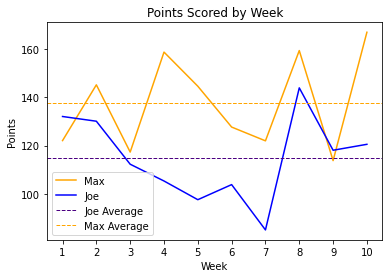

In [168]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x, cp['FPTS'], label = 'Max', color='orange')
plt.plot(x, cm['FPTS'], label = 'Joe', color='b')
plt.axhline(cm['FPTS'].mean(), color='indigo', linestyle='dashed', linewidth=1, label='Joe Average')
plt.axhline(cp['FPTS'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Max Average')

#label
label("Week", "Points", "Points Scored by Week")

In [169]:
#query for the matchups
mfc = starters.query("ABBR =='MF' | ABBR =='CP'")

In [170]:
#groupy by/seperate by team
mfc = mfc.groupby(['WEEK','ABBR'])['FPTS'].sum().reset_index().sort_values('WEEK', ascending=True)
mf = mfc.query('ABBR =="MF"')
c_p = mfc.query('ABBR =="CP"')

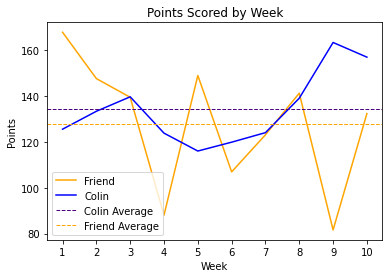

In [172]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x, mf['FPTS'], label = 'Friend', color='orange')
plt.plot(x, c_p['FPTS'], label = 'Colin', color='b')
plt.axhline(c_p['FPTS'].mean(), color='indigo', linestyle='dashed', linewidth=1, label='Colin Average')
plt.axhline(mf['FPTS'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Friend Average')

#label
label("Week", "Points", "Points Scored by Week")

In [175]:
#losers matchup
standings.query("ABBR =='MW' | ABBR =='MS'")

,RK,TEAM,ABBR,W,L,T,PCT,GB,PLAYOFF %,PF,PA,STRK,MOVES,DIFF
8,9,Kush Warlock,MW,4,6,0,0.4,3,1,1025.76,1204.68,L1,10,-178.92
11,12,😈 ⏰,MS,3,7,0,0.3,4,1,1089.92,1160.40,W2,13,-70.48


In [177]:
#query for the matchups
sw = starters.query("ABBR =='MW' | ABBR =='MS'")

In [178]:
#groupy by/seperate by team
sw = sw.groupby(['WEEK','ABBR'])['FPTS'].sum().reset_index().sort_values('WEEK', ascending=True)
ms = sw.query('ABBR =="MS"')
mw = sw.query('ABBR =="MW"')

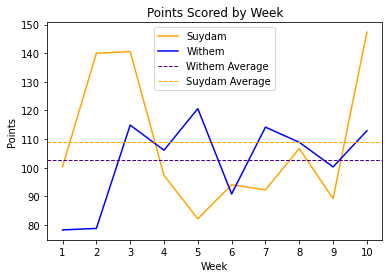

In [179]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x, ms['FPTS'], label = 'Suydam', color='orange')
plt.plot(x, mw['FPTS'], label = 'Withem', color='b')
plt.axhline(mw['FPTS'].mean(), color='indigo', linestyle='dashed', linewidth=1, label='Withem Average')
plt.axhline(ms['FPTS'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Suydam Average')

#label
label("Week", "Points", "Points Scored by Week")

In [180]:
#group difference in point differential for matchup tables
standings.groupby(["ABBR"])['DIFF'].mean().reset_index().sort_values('DIFF', ascending=False)

,ABBR,DIFF
2,CP,233.00
6,MC,176.02
7,MF,131.48
4,JG,65.50
11,SB,18.00
1,CM,5.46
5,LW,-1.58
3,DB,-15.88
8,MS,-70.48
10,SA,-162.88


In [181]:
#group moves for matchup tables
standings.groupby(["ABBR"])['MOVES'].mean().reset_index().sort_values('MOVES', ascending=False)

,ABBR,MOVES
3,DB,25.0
2,CP,20.0
7,MF,15.0
6,MC,13.0
8,MS,13.0
5,LW,10.0
9,MW,10.0
0,AD,9.0
1,CM,7.0
4,JG,6.0


# The League

In [182]:
#find averages of league fpts, take points and create a list
#assign to list for plotting (t)
pt_avg = starters.groupby(['WEEK'])['FPTS'].sum().reset_index().sort_values('WEEK', ascending=True)
t = pt_avg['FPTS']/12
t

0    106.550000
1    124.436667
2    128.003333
3    112.496667
4    119.496667
5    112.560000
6    113.016667
7    126.386667
8    106.726667
9    118.195000
Name: FPTS, dtype: float64

In [84]:
#find averages of league fpts, take points and create a list
#assign to list for plotting (r)
pr_avg = starters.groupby(['WEEK'])['PROJ'].sum().reset_index().sort_values('WEEK', ascending=True)
r = pr_avg['PROJ']/12
r

0    120.691667
1    121.933333
2    121.700000
3    122.025000
4    118.158333
5    125.716667
6    117.516667
7    124.958333
8    117.700000
9    117.683333
Name: PROJ, dtype: float64

In [85]:
#turn list for FPTS (t) to a round integer, then change data type to int to remove decimal
y1 = t.to_numpy()
y2 = np.rint(y1)
y = y2.astype(int)

In [86]:
#turn list for FPTS (t) to a round integer, then change data type to int to remove decimal
w1 = r.to_numpy()
w2 = np.rint(w1)
w = w2.astype(int)

In [87]:
#create array for x axis
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

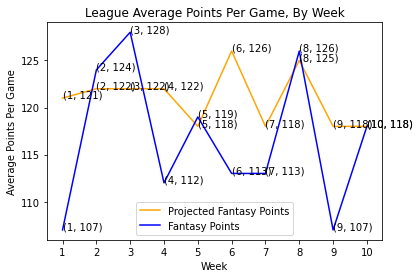

In [88]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x, w, label = 'Projected Fantasy Points', color='orange')
plt.plot(x, y, label = 'Fantasy Points', color='b')

#coordinates
for xy in zip(x, y):                                       
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(x, w):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
#label
label("Week", "Average Points Per Game", "League Average Points Per Game, By Week")

In [89]:
#make list for difference of average scored vs. projected
d_list = np.subtract(y,w)
d_list

array([-14,   2,   6, -10,   1, -13,  -5,   1, -11,   0])

In [91]:
#assign color to plots
color = np.where(d_list<0, 'orange', 'blue')
color

array(['orange', 'blue', 'blue', 'orange', 'blue', 'orange', 'orange',
       'blue', 'orange', 'blue'], dtype='<U6')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


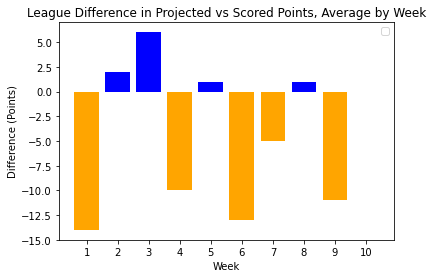

In [92]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.bar(x, d_list, color=color)


#label
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
label("Week", "Difference (Points)", "League Difference in Projected vs Scored Points, Average by Week")

In [93]:
#find sum of team fpts for histogram, by game/week
tm_pt = starters.groupby(['WEEK','ABBR'])['FPTS'].sum().reset_index().sort_values('WEEK', ascending=True)

In [94]:
#findsum of team fpts for histogram, by game/week
tm_pr = starters.groupby(['WEEK','ABBR'])['PROJ'].sum().reset_index().sort_values('WEEK', ascending=True)

In [95]:
#x axis
listOf_Xticks = np.arange(70, 210, 10)

In [96]:
#long story
bins = np.arange(70, 200, 7.5)
bins1 = np.arange(75, 140, 7.5)

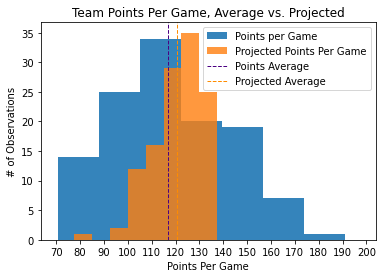

In [109]:
#set up
fig = plt.figure()
ax = fig.add_subplot(111)

#plot
plt.hist(tm_pt['FPTS'], bins=7, alpha = 0.9, label = 'Points per Game')
plt.hist(tm_pr['PROJ'], bins=bins, alpha = 0.8, label = 'Projected Points Per Game')
plt.axvline(tm_pt['FPTS'].mean(), color='indigo', linestyle='dashed', linewidth=1, label='Points Average')
plt.axvline(tm_pr['PROJ'].mean(), color='darkorange', linestyle='dashed', linewidth=1, label='Projected Average')

#label
plt.xticks(listOf_Xticks)
label("Points Per Game","# of Observations", "Team Points Per Game, Average vs. Projected")

In [114]:
#make new variable for difference
p_d['DIFF'] = p_d['FPTS'] - p_d['PROJ']
dd_2 = p_d.sort_values('DIFF', ascending=False)
dd_2

,ABBR,FPTS,PROJ,DIFF
0,MC,1377.80,1258.5,119.30
1,CP,1341.70,1293.0,48.70
3,SB,1256.40,1246.4,10.00
7,CM,1107.98,1119.5,-11.52
2,MF,1277.20,1295.1,-17.90
10,MW,1025.76,1080.3,-54.54
5,JG,1148.58,1207.7,-59.12
4,LW,1166.64,1238.3,-71.66
9,MS,1089.92,1186.9,-96.98
8,AD,1107.28,1217.1,-109.82


In [115]:
#merge two dataframes first to find top projections and how they did
top_pr = tm_pt.merge(tm_pr, on=['ABBR', 'WEEK'],how="inner")
top_pr['DIFF'] = top_pr['FPTS'] - top_pr['PROJ']

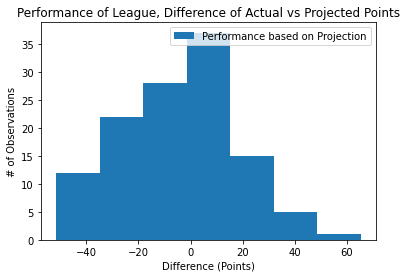

In [116]:
#since I'm so invested in this already, let's plot a histogram of the differences 
plt.hist(top_pr['DIFF'], bins=7, label='Performance based on Projection')
label("Difference (Points)", "# of Observations", "Performance of League, Difference of Actual vs Projected Points")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


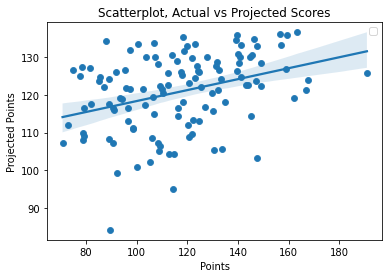

In [117]:
# call the seaborn scatterplot function per usual
sns.scatterplot(data=top_pr, x="FPTS", y="PROJ")
ax = sns.regplot(data=top_pr, x="FPTS", y="PROJ")

# define titles and axes labels
label("Points","Projected Points","Scatterplot, Actual vs Projected Scores")

# call the scipy function for pearson correlation

r, p = sp.stats.pearsonr(x=top_pr['FPTS'], y=top_pr['PROJ'])


In [121]:
print(np.corrcoef(top_pr['FPTS'], top_pr['PROJ']))

[[1.         0.35274259]
 [0.35274259 1.        ]]


In [122]:
#moves graph set up
moves = standings.reset_index().sort_values('MOVES', ascending=False).head(4)
moves = moves.reset_index().sort_values('MOVES', ascending=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


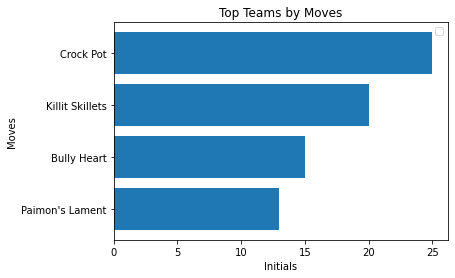

In [123]:
#moves, plot/label
plt.barh(moves['TEAM'], moves['MOVES'])
label("Initials", "Moves", "Top Teams by Moves")

# The Teams

In [124]:
#create df for bar chart, Fantasy Points by desc
a = starters.groupby(["ABBR"])['FPTS'].sum().reset_index().sort_values('FPTS', ascending=False)

In [125]:
#create df for bar chart, Projected Points by desc
b = starters.groupby(["ABBR"])['PROJ'].sum().reset_index().sort_values('PROJ', ascending=False)

In [126]:
#merge dataframes 
p_d = pd.merge(a, b, on="ABBR",how="inner")
dd = p_d.sort_values('FPTS', ascending=False)
dd

,ABBR,FPTS,PROJ
0,MC,1377.80,1258.5
1,CP,1341.70,1293.0
2,MF,1277.20,1295.1
3,SB,1256.40,1246.4
4,LW,1166.64,1238.3
5,JG,1148.58,1207.7
6,DB,1124.42,1245.0
7,CM,1107.98,1119.5
8,AD,1107.28,1217.1
9,MS,1089.92,1186.9


In [127]:
#make table for averages
dd['A_FPTS'] = dd['FPTS']/10
dd['A_PROJ'] = dd['PROJ']/10
dd

,ABBR,FPTS,PROJ,A_FPTS,A_PROJ
0,MC,1377.80,1258.5,137.780,125.85
1,CP,1341.70,1293.0,134.170,129.30
2,MF,1277.20,1295.1,127.720,129.51
3,SB,1256.40,1246.4,125.640,124.64
4,LW,1166.64,1238.3,116.664,123.83
5,JG,1148.58,1207.7,114.858,120.77
6,DB,1124.42,1245.0,112.442,124.50
7,CM,1107.98,1119.5,110.798,111.95
8,AD,1107.28,1217.1,110.728,121.71
9,MS,1089.92,1186.9,108.992,118.69


In [128]:
#sort values 
dd.reset_index().sort_values('A_PROJ', ascending=False)

,index,ABBR,FPTS,PROJ,A_FPTS,A_PROJ
2,2,MF,1277.20,1295.1,127.720,129.51
1,1,CP,1341.70,1293.0,134.170,129.30
0,0,MC,1377.80,1258.5,137.780,125.85
3,3,SB,1256.40,1246.4,125.640,124.64
6,6,DB,1124.42,1245.0,112.442,124.50
4,4,LW,1166.64,1238.3,116.664,123.83
8,8,AD,1107.28,1217.1,110.728,121.71
5,5,JG,1148.58,1207.7,114.858,120.77
9,9,MS,1089.92,1186.9,108.992,118.69
7,7,CM,1107.98,1119.5,110.798,111.95


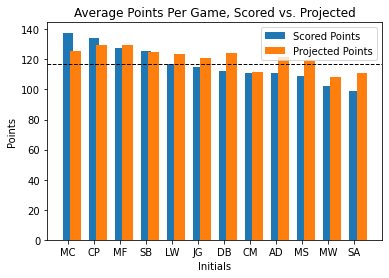

In [129]:
# create list for x axis
X = dd['ABBR']
X_axis = np.arange(len(X))

#plot the bar graph
plt.bar(X_axis, dd['A_FPTS'], 0.4, label = 'Scored Points')
plt.bar(X_axis +.3, dd['A_PROJ'], 0.4, label = 'Projected Points')
plt.axhline(dd['A_FPTS'].mean(), color='black', linestyle='dashed', linewidth=1)


#label axis + title
plt.xticks(X_axis, X)
label("Initials", "Points", "Average Points Per Game, Scored vs. Projected")


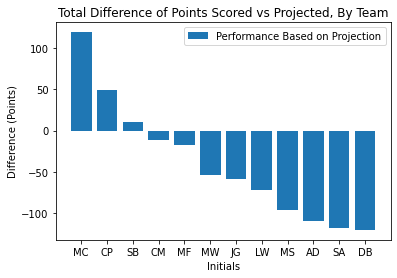

In [130]:
#plot
plt.bar(dd_2['ABBR'], dd_2['DIFF'], label = 'Performance Based on Projection')
#label
label("Initials","Difference (Points)", "Total Difference of Points Scored vs Projected, By Team")

In [131]:
#descriptive stats on proj
print("Descriptive Stats on Projected Points")
tm_pr['PROJ'].describe()

Descriptive Stats on Projected Points


count    120.000000
mean     120.808333
std       10.154807
min       84.100000
25%      114.400000
50%      122.450000
75%      128.250000
max      136.600000
Name: PROJ, dtype: float64

In [132]:
#descriptive stats on fpts
print("Descriptive Stats on Points")
tm_pt['FPTS'].describe()

Descriptive Stats on Points


count    120.000000
mean     116.786833
std       24.601474
min       70.720000
25%       97.170000
50%      116.410000
75%      133.475000
max      190.880000
Name: FPTS, dtype: float64

In [133]:
#sort on lowest projections
top_pr.sort_values("PROJ", ascending=True).head(5)

,WEEK,ABBR,FPTS,PROJ,DIFF
57,5,CM,89.40,84.1,5.30
74,7,MW,114.18,94.9,19.28
75,7,MS,92.26,99.1,-6.84
101,9,MW,100.28,100.7,-0.42
47,4,JG,105.30,102.1,3.20


In [134]:
#sort on top projections
top_pr.sort_values("PROJ", ascending=False).head(5)

,WEEK,ABBR,FPTS,PROJ,DIFF
104,9,CP,163.36,136.6,26.76
87,8,SB,156.38,136.3,20.08
24,3,MF,139.46,136.0,3.46
89,8,MC,159.42,136.0,23.42
42,4,LW,118.40,135.3,-16.90


In [135]:
#best performances, over projected
top_pr.sort_values("DIFF", ascending=False).head(5)

,WEEK,ABBR,FPTS,PROJ,DIFF
53,5,SB,190.88,125.7,65.18
111,10,MC,167.02,121.2,45.82
109,10,MS,147.34,103.2,44.14
4,1,MF,167.82,123.9,43.92
55,5,DB,161.98,119.3,42.68


In [136]:
#lowest performances, under projected
top_pr.sort_values("DIFF", ascending=True).head(5)

,WEEK,ABBR,FPTS,PROJ,DIFF
8,1,DB,75.02,126.6,-51.58
3,1,MW,78.26,127.5,-49.24
79,7,DB,77.58,125.1,-47.52
40,4,MF,88.06,134.4,-46.34
99,9,MF,81.62,127.2,-45.58


In [137]:
standings.head()

,RK,TEAM,ABBR,W,L,T,PCT,GB,PLAYOFF %,PF,PA,STRK,MOVES,DIFF
0,1,Killit Skillets,CP,7,3,0,0.7,0,93,1341.70,1108.70,W3,20,233.00
1,2,Giles C,JG,7,3,0,0.7,0,86,1148.58,1083.08,L1,6,65.50
2,3,Bully Heart,MF,6,4,0,0.6,1,61,1277.20,1145.72,W1,15,131.48
3,4,Crock Pot,DB,6,4,0,0.6,1,43,1124.42,1140.30,W1,25,-15.88
4,5,Talking Taints,CM,6,4,0,0.6,1,49,1107.98,1102.52,L4,7,5.46


In [138]:
#create dataframe, group ON 'Team' (abbreviation, to fit on x axis) BY 'Points For', Sort values
points = standings.groupby(["ABBR"])['PF'].sum().reset_index().sort_values('PF', ascending=False)

In [139]:
#create dataframe, group ON 'Team' (abbreviation, to fit on x axis) BY 'Points Against', sort values
points_ag = standings.groupby(["ABBR"])['PA'].mean().reset_index().sort_values('PA', ascending=False)

In [140]:
#merge for plot
merge = points.merge(points_ag, on='ABBR')
merge

,ABBR,PF,PA
0,MC,1377.80,1201.78
1,CP,1341.70,1108.70
2,MF,1277.20,1145.72
3,SB,1256.40,1238.40
4,LW,1171.64,1173.22
5,JG,1148.58,1083.08
6,DB,1124.42,1140.30
7,CM,1107.98,1102.52
8,AD,1107.28,1307.00
9,MS,1089.92,1160.40


In [141]:
merge['DIFF'] = merge['PF'] - merge['PA']
merged = merge.reset_index().sort_values('DIFF', ascending=False)
merged

,index,ABBR,PF,PA,DIFF
1,1,CP,1341.70,1108.70,233.00
0,0,MC,1377.80,1201.78,176.02
2,2,MF,1277.20,1145.72,131.48
5,5,JG,1148.58,1083.08,65.50
3,3,SB,1256.40,1238.40,18.00
7,7,CM,1107.98,1102.52,5.46
4,4,LW,1171.64,1173.22,-1.58
6,6,DB,1124.42,1140.30,-15.88
9,9,MS,1089.92,1160.40,-70.48
11,11,SA,990.74,1153.62,-162.88


In [142]:
#find average points per game by dividing total by # of weeks
e = merge['PF'].divide(10)
f = merge['PA'].divide(10)

In [143]:
#check min
f.min()

108.30799999999999

In [144]:
#check max
f.max()

130.7

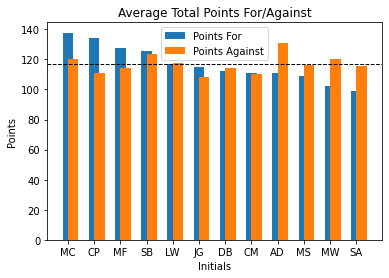

In [145]:
#X axis tick labels, define variables
X = merge['ABBR']
X_axis = np.arange(len(X))

#plot bar graphs
plt.bar(X_axis, e, 0.4, label = 'Points For' )
plt.bar(X_axis +.2, f, 0.4, label = 'Points Against')
plt.axhline(e.mean(), color='black', linestyle='dashed', linewidth=1)

#label axis/title
plt.xticks(X_axis, X)
label("Initials", "Points", "Average Total Points For/Against")


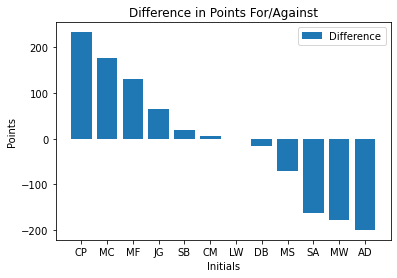

In [146]:
#X axis tick labels, define variables
X = merged['ABBR']
X_axis = np.arange(len(X))

#plot
plt.bar(X_axis, merged['DIFF'], label='Difference')
#label
plt.xticks(X_axis, X)
label("Initials", "Points", "Difference in Points For/Against")

In [147]:
#top 5 performances
starters.groupby(['WEEK', 'TEAM_NAME'])['FPTS'].sum().reset_index().sort_values('FPTS', ascending=False).head(5)

,WEEK,TEAM_NAME,FPTS
50,5,Captain Ben Safarz,190.88
1,1,Bully Heart,167.82
116,10,Paimon's Lament,167.02
102,9,Killit Skillets,163.36
51,5,Crock Pot,161.98


In [148]:
#bottom 5 performances
starters.groupby(['WEEK', 'TEAM_NAME'])['FPTS'].sum().reset_index().sort_values('FPTS', ascending=True).head(5)

,WEEK,TEAM_NAME,FPTS
98,9,Captain Ben Safarz,70.72
34,3,Team :(,72.96
3,1,Crock Pot,75.02
75,7,Crock Pot,77.58
7,1,Kush Warlock,78.26


In [149]:
#exclude proj=0 from bench
inj_bench = bench.query('PROJ != 0')
inj_bench['PROJ'].min()
inj_bench

,WEEK,TEAM_NAME,ABBR,POS,TEAM,SLOT,PLAYER,PROJ,FPTS,DIFF
11,1,Team :(,SA,WR,Wsh,Bench,Jahan Dotson,11.2,9.00,-2.20
12,1,Team :(,SA,QB,Ind,Bench,Anthony Richardson,17.2,20.92,3.72
13,1,Team :(,SA,WR,Min,Bench,K.J. Osborn,7.9,6.10,-1.80
14,1,Team :(,SA,TE,NE,Bench,Mike Gesicki,7.2,6.60,-0.60
15,1,Team :(,SA,RB,TB,Bench,Chase Edmonds,4.0,0.80,-3.20
...,...,...,...,...,...,...,...,...,...,...
1896,10,Bully Heart,MF,RB,Ind,Bench,Zack Moss,8.6,0.20,-8.40
1898,10,Bully Heart,MF,QB,Min,Bench,Joshua Dobbs,15.2,25.12,9.92
1909,10,Kush Warlock,MW,WR,NYJ,Bench,Allen Lazard,6.3,2.70,-3.60
1912,10,Kush Warlock,MW,WR,Ind,Bench,Josh Downs,8.6,6.00,-2.60


In [151]:
#find means by team, bench performance
f = inj_bench.groupby(["ABBR"])['FPTS'].mean().reset_index().sort_values('FPTS', ascending=False)
i = inj_bench.groupby(["ABBR"])['DIFF'].mean().reset_index().sort_values('DIFF', ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


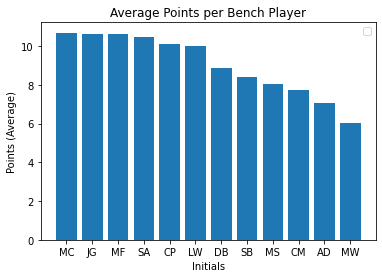

In [153]:
#X axis tick labels, define variables
X = f['ABBR']
X_axis = np.arange(len(X))

plt.bar(X_axis, f['FPTS'])

plt.xticks(X_axis, X)
label("Initials", "Points (Average)", "Average Points per Bench Player")

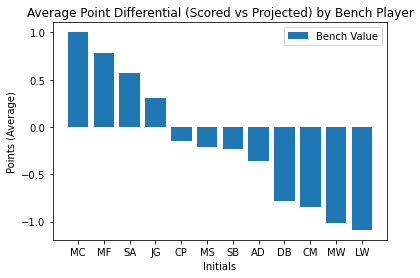

In [154]:
#X axis tick labels, define variables
X = i['ABBR']
X_axis = np.arange(len(X))

#plot
plt.bar(X_axis, i['DIFF'], label = 'Bench Value')

#label
plt.xticks(X_axis, X)
label("Initials", "Points (Average)", "Average Point Differential (Scored vs Projected) by Bench Player")

# The Players

In [155]:
#top 10 above projected
player.groupby(['PLAYER'])['DIFF'].sum().reset_index().sort_values('DIFF', ascending=False).head(10)

,PLAYER,DIFF
72,De'Von Achane,61.60
0,A.J. Brown,49.20
165,Keenan Allen,48.66
35,CeeDee Lamb,48.40
4,Adam Thielen,40.20
55,Dak Prescott,39.84
233,Tank Dell,36.40
13,Amon-Ra St. Brown,34.20
210,Raheem Mostert,33.00
261,Zack Moss,32.40


In [156]:
#bottom 10 (below projected)
player.groupby(['PLAYER'])['DIFF'].sum().reset_index().sort_values('DIFF', ascending=True).head(10)

,PLAYER,DIFF
238,Tony Pollard,-47.20
197,Miles Sanders,-42.30
68,Davante Adams,-41.60
206,Patrick Mahomes,-37.62
18,Bijan Robinson,-36.90
59,Dalvin Cook,-36.30
32,Calvin Ridley,-31.40
8,Alexander Mattison,-31.10
138,Joe Burrow,-30.28
162,Kadarius Toney,-30.20


In [158]:
#fpts by position, Starters only
starters.groupby(['POS'])['FPTS'].mean().reset_index().sort_values('FPTS', ascending=False)

,POS,FPTS
1,QB,17.247333
4,WR,13.805937
2,RB,13.208179
3,TE,10.736642
0,K,7.966667


In [159]:
#fpts by slot, Starters Only
starters.groupby(['SLOT'])['FPTS'].mean().reset_index().sort_values('FPTS', ascending=False)

,SLOT,FPTS
2,QB,17.247333
5,WR,14.492250
3,RB,13.298243
0,FLEX,12.761250
4,TE,10.580167
1,K,7.966667


In [179]:
#positions used in flex
flx = starters.query('SLOT == "FLEX"')
flx['POS'].value_counts()

WR    139
RB     40
TE     13
Name: POS, dtype: int64

In [160]:
#who is playing TE at flex?
starters.query('POS == "TE" & SLOT == "FLEX"')

,WEEK,TEAM_NAME,ABBR,POS,TEAM,SLOT,PLAYER,PROJ,FPTS,DIFF
501,3,Captain Ben Safarz,SB,TE,NE,FLEX,Hunter Henry,8.3,3.7,-4.6
820,5,Bully Heart,MF,TE,Bal,FLEX,Mark Andrews,12.5,12.5,0.0
852,5,Kush Warlock,MW,TE,NYG,FLEX,Darren Waller,10.1,16.6,6.5
868,5,😈 ⏰,MS,TE,Chi,FLEX,Cole Kmet,9.6,15.2,5.6
1028,6,Bully Heart,MF,TE,Bal,FLEX,Mark Andrews,13.0,10.9,-2.1
1044,6,😈 ⏰,MS,TE,Chi,FLEX,Cole Kmet,10.7,2.9,-7.8
1060,6,Kush Warlock,MW,TE,NYG,FLEX,Darren Waller,11.5,9.3,-2.2
1204,7,😈 ⏰,MS,TE,Chi,FLEX,Cole Kmet,9.6,0.0,-9.6
1268,7,Bully Heart,MF,TE,Bal,FLEX,Mark Andrews,12.5,22.3,9.8
1300,7,Kush Warlock,MW,TE,NYG,FLEX,Darren Waller,10.8,22.8,12.0
